In [107]:
%run "libraries.ipynb"

common libraries loaded


# page selection

In [4]:
pages = codecs.open("data/pagenames.txt","r", "utf-8-sig").readlines()
pages = map(lambda x: x.strip(), pages)

In [149]:
page = "Triangle"

## clickstream

In [150]:
with codecs.open("data/clickstream/{0}.json".format(page), "r", "utf-8-sig") as f:
  clickstreams = json.load(f)

In [151]:
# print(clickstreams)

df_clickstreams = pd.DataFrame(clickstreams["out"].items(), columns=["page", "out"]).set_index("page")

df_clickstreams = df_clickstreams.join(pd.DataFrame(clickstreams["in"].items(), columns=["page", "in"]).set_index("page"), how="outer", rsuffix="in")

df_clickstreams = df_clickstreams.fillna(0)

df_clickstreams = df_clickstreams.convert_objects(convert_numeric=True) 

df_clickstreams.head()

,out,in
page,,
Acute,0,39
Acute and obtuse triangles,109,33
Adjacent,0,23
Altitude (triangle),90,18
Angle,42,25


In [152]:
df_clickstreams["m"] = df_clickstreams.apply(lambda r: (float(r["out"]) + float(r["in"])) * 0.5, axis=1 )

df_clickstreams.head()

,out,in,m
page,,,
Acute,0,39,19.5
Acute and obtuse triangles,109,33,71.0
Adjacent,0,23,11.5
Altitude (triangle),90,18,54.0
Angle,42,25,33.5


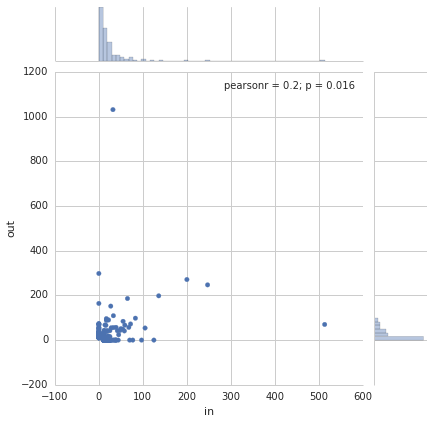

In [153]:
df = df_clickstreams.loc[[ i for i in df_clickstreams.index if "other-" not in i and i != "Main_Page"],:]

sns.jointplot(x="in", y="out", data=df);

## position

In [154]:
with codecs.open("data/pages/{0}.json".format(page), "r", "utf-8-sig") as f:
  q = json.load(f)

  content = q["query"]["pages"][q["query"]["pages"].keys()[0]]["revisions"][0]["*"]

In [155]:
links = BeautifulSoup(content, 'html.parser').find_all('a')

print len(links)
# print [ l.get("title") for l in links ]
print ""

links1 = [ l.get("title") for l in links if l.get("title") in pages ]
print len(links1)
print links1
print ""

def get_redirects(pagename):
    if os.path.isfile(u"data/redirects/{0}.json".format(pagename)):
        with codecs.open(u"data/redirects/{0}.json".format(pagename), "r", "utf-8-sig") as f:
            redirects = json.load(f)
        
        return [ r["title"] for r in redirects ]
    
    else:
        return []
    
redirects = { pagename: get_redirects(pagename) for pagename in pages }

links2 = []

for l in [ l.get("title") for l in links ]:
    if l in pages:
        links2.append(l)
    
    for pagename, r in redirects.iteritems() :
        if l in r:
            links2.append(pagename)
    

print len(links2)
print links2
print ""

573

64
[u'Schl\xe4fli symbol', u'Polygon', u'Shape', u'Geometry', u'Euclidean geometry', u'Equilateral triangle', u'Isosceles triangle', u'Isosceles triangle', u'Right triangle', u'Angle', u'Pythagorean theorem', u'Pythagorean triple', u'Right triangle', u'Polytope', u'Parallel postulate', u'Similarity (geometry)', u'Congruence (geometry)', u'Angle', u'Trigonometry', u'Pythagorean theorem', u'Right triangle', u'Triangle inequality', u'Triangle', u'Concurrent lines', u'Circle', u"Thales' theorem", u'Altitude (triangle)', u'Orthocentric system', u'Nine-point circle', u'Nine-point circle', u'Nine-point circle', u'Symmedian', u'Right triangle', u'Right triangle', u'Trigonometry', u'Trigonometry', u'Sphere', u'Astronomy', u'Trigonometry', u"Heron's formula", u'Polygon', u"Pick's theorem", u'Incircle and excircles of a triangle', u'Cyclic quadrilateral', u'Ellipse', u'Polygon', u'Pedal triangle', u'Spherical geometry', u'Hyperbolic geometry', u'Sphere', u'Rectangle', u'Tessellation', u'Cong

In [156]:
print set([ l.get("title") for l in links ]) - set(links2)

set([u'Heptagon', u'Triacontagon', u'Edit section: Specifying the location of a point in a triangle', u'If and only if', u'Megagon', u'MathWorld', u'Angle bisector', u'Spherical triangle', u'Centroid', u'Theorem', u'Flatiron Building', u'Hectogon', u'Edit section: Sine, cosine and tangent', u'Broadway (Manhattan)', u'Solution of triangles', u'Indian astronomy', u'Pythagorean sum', u'Edit section: Using trigonometry', u'Encyclopedia of Mathematics', u'Apeirogon', u"Edit section: Formulas resembling Heron's formula", u'Midpoint', u'Triangular prism', u'Myriagon', u'Digital object identifier', u'Triangulation (topology)', u'Earthquake', u'Inverse trigonometric functions', u'Absolute value', u'Law of sines', u'Space frame', u'Triangular number', u'Conic', u'257-gon', u'wikt:collinear', u'Edit section: External links', u"Marden's theorem", u'Hyperbolic triangle', u'Finite subdivision rule', u'Pentagram', u'Similar triangles', u'Incenter', u'wiktionary:Special:Search/triangle', u'Steiner ell

## position rank x clickstream out rank

In [157]:
print len(set(df_clickstreams.index) - set(links2))

119


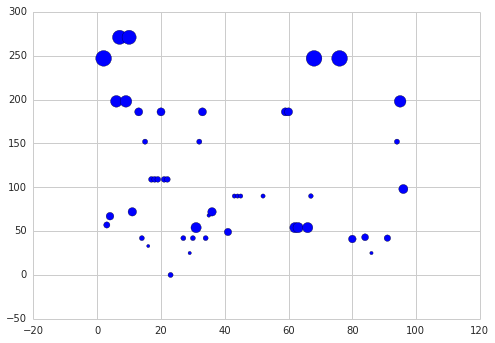

In [158]:
# sns.jointplot([ i for i, x in enumerate(links2) ], map(lambda x: df_clickstreams.loc[x,"out"] if x in df_clickstreams.index else 0, links2));
# sns.kdeplot(map(lambda x: df_clickstreams.loc[x,"out"] if x in df_clickstreams.index else 0, links2));

x = [ i for i, x in enumerate(links2) ]
y = map(lambda x: df_clickstreams.loc[x,"out"] if x in df_clickstreams.index else 0, links2)
area = map(lambda x: df_clickstreams.loc[x,"in"] if x in df_clickstreams.index else 0, links2)

plt.scatter(x, y, s=area)

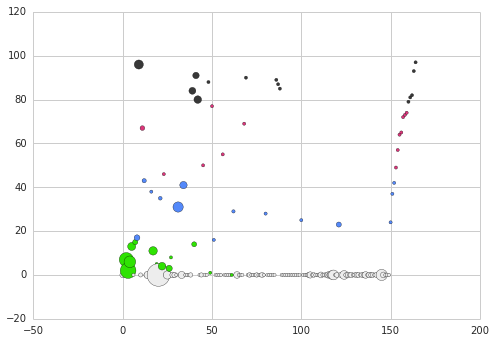

In [159]:
df_sorted = df_clickstreams.sort_index(by="out", ascending=False)
df_sorted = df_sorted.loc[ list([ i for i in df_sorted.index if "other-" not in i ]), : ]

for l in links2:
    df_sorted.set_value(l, "position", links2.index(l))

def get_color(value):
    c = "#ededed"
    
    green = "#2fe203"
    blue = "#5489fa"
    red  = "#dc357a"
    grey = "#383838"
    
    if 0 < value <= 0.25:
        c = green
    elif 0.25 < value <= 0.5:
        c = blue
    elif 0.5 < value <= 0.75:
        c = red
    elif 0.75 < value <= 1:
        c = grey

    return c

x = [ i for i, x in enumerate(df_sorted.index) ]
y = map(lambda x: links2.index(x) if x in links2 else 0, df_sorted.index)
area = [ max(10, i) for i in df_sorted["in"] ]
colors = map(get_color, df_sorted.rank(pct=True)["position"].values)

plt.scatter(x, y, s=area, c=colors);